<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pytorch workflow

this is one of the workflow that you can follow:
- get data ready ( turn into tensors )
- build or pick a pretrained model( to suit your problem )

- fit the model to the data and make a prediction
- evaluate your model
- imporve thorught expremaentaion
- save and reload your train model

## what_were_convering

1. data ( prepare and load)
1. build model
1. fitting the model to data ( training )
1. making predictions and evaluating a model ( inference )
1. saving and load a model
1. putting it all together


In [1]:
import torch
from torch import nn ## nn contains all of pytorch building blocks of nerual networks
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
torch.__version__

'2.5.0+cu121'

In [3]:
torch.cuda.is_available()

False

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## preparing and loading data

data can be almost anythign in amchine learning
* excel speadsheet
* videos
* images of any kind
* audio like songs or podcasts
* text

Machine leaning is a game of two parts:
1. get dat into a numberical representaion
2. buidl a model to learn pattersn in the numerical representaion

to showcase this , lets create some *known* data usign the linear regression formula

well use a linear regression formuat to make a straight line with *known* **parameters**


In [6]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
## splitting dat into train and test set one fo the most important concept in machine learning

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [9]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [10]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [11]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
    plot trainig data and predictions
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="test data")
    if predictions is not None:
        # plot predictions in red
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")
    plt.legend(prop={"size":14})
    plt.show()


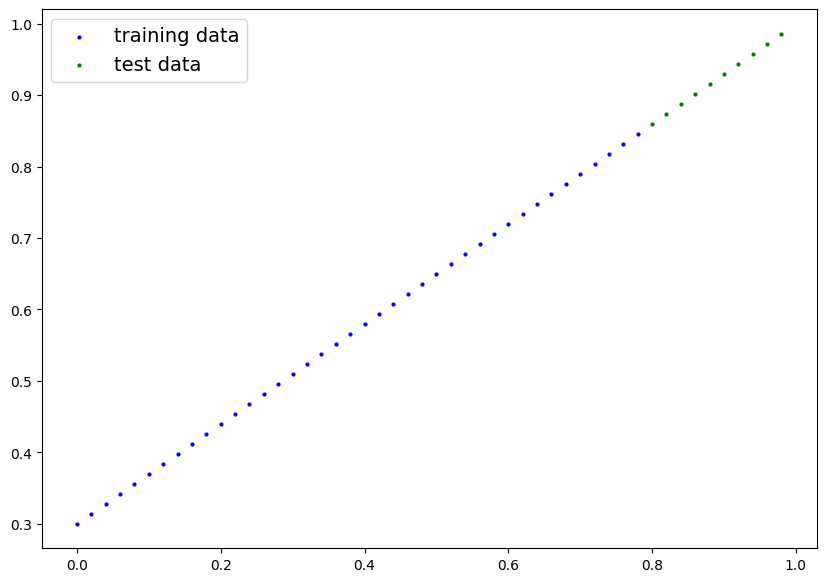

In [12]:
plot_predictions()

## builng model
our first pytorch model
this is very existing lets do it ...

* start with ranodm values ( weights and bias )
* look at training data and adjust the ranodm values to better represent ( or get closer to ) the ideal values ( the weight and bias values we used to create the data )
* how does it do so ?
through two main algorithms:
1. grdient descent
2. backpropagraion

In [13]:
# CReate a linear regresion model class
class LinearRegressionModelV1(nn.Module): # alomost everythign in pytorch inherit form nn.model
    def __init__(self):
        super().__init__()
        # use nn.Linear()
        # initialze model parameter to be used in various computetaions ( these could different layer fro torch , nn,single parameter , hard coded values or fuctions )

        self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        # requires_grad=True means pytorch will track the gradients of this specific paramteter for use with torch .autograd and gradient descent ( for mahny torch.nn.modules , requres_grad=True si set by default )


        # forward method to define teh computraion in the model
        # any subclass of nn.module needs to overdie forward() this defines forward comutaion of the model
        def forward(self,x: torch.Tensor) -> torch.Tensor: # x is the input data
            return self.weights * x + self.bias # this is teh linear regression formula


#### pytorch model buiding essentilas
* torch.nn - contains all of the buildig for compuraiton graphs
*  torch.nn.parameter - what parameter should our model try and learn , often a pytorch layer form

* torch.nn.module the base class for all nerual netwrok moduel
* torch.optim - this is where the optirmzers in pytorhc liive , they will help in gradient decend  
* def forward() - all nn.module subcalasses rqurre you to overwrite forward() ,
* torhc.utils.data.Dataset presents a map between key ( label ) and sample ( features ) pairs of yoru data such as images and their assocaiated lables
* torch.utils.data.DataLoader creates a python iterable over a torch Dataset ( allows you to iterate over your data )

